In [2]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [3]:
import pandas as pd

df1 = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', delimiter="\t")
df1 = df1.drop(['id'], axis=1)
df1.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
df2 = pd.read_csv('../input/imdb-review-dataset/imdb_master.csv',encoding="latin-1")
df2.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [5]:
df2 = df2.drop(['Unnamed: 0','type','file'],axis=1)
df2.columns = ["review","sentiment"]
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [6]:
df2 = df2[df2.sentiment != 'unsup']
df2['sentiment'] = df2['sentiment'].map({'pos': 1, 'neg': 0})
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [18]:
df = pd.concat([df1, df2]).reset_index(drop=True)
df.head()
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
74970     True
74971     True
74972    False
74973     True
74974    False
74975     True
74976    False
74977    False
74978     True
74979     True
74980    False
74981     True
74982     True
74983     True
74984     True
74985     True
74986     True
74987    False
74988     True
74989    False
74990     True
74991    False
74992     True
74993     True
74994    False
74995    False
74996    False
74997     True
74998     True
74999    False
Length: 75000, dtype: bool


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
74931    False
74932    False
74933    False
74935    False
74936    False
74949    False
74950    False
74951    False
74953    False
74954    False
74956    False
74957    False
74958    False
74959    False
74960    False
74965    False
74967    False
74968    False
74972    False
74974    False
74976    False
74977    False
74980    False
74987    False
74989    False
74991    False
74994    False
74995    False
74996    False
74999    False
Length: 62155, dtype: bool


In [27]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

df['Processed_Reviews'] = df.review.apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df.head()

,review,sentiment,Processed_Reviews
0,With all this stuff going down at the moment w...,1,stuff go moment mj ive start listen music watc...
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,classic war world timothy hines entertain film...
2,The film starts with a manager (Nicholas Bell)...,0,film start manager nicholas bell give welcome ...
3,It must be assumed that those who praised this...,0,must assume praise film greatest film opera ev...
4,Superbly trashy and wondrously unpretentious 8...,1,superbly trashy wondrously unpretentious 80 ex...


In [28]:
df.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

134.23220979808542

(-0.5, 799.5, 799.5, -0.5)

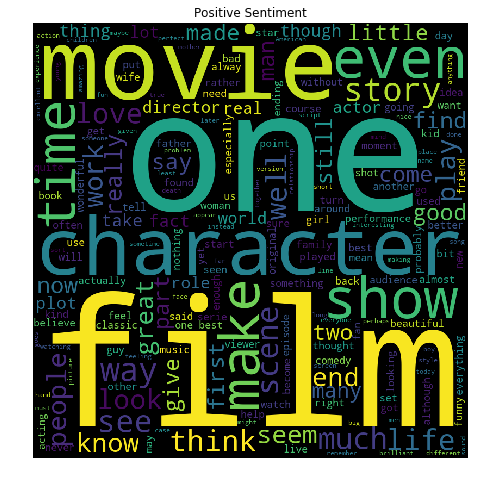

In [29]:
# we will be using various libraries like os for taking the input,etc
# I have used some libraries like seaborn, wordcloud, matplotlib for data visualization so
# you can skip them if you don't understand 

import os
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
sentences=df['review']
stopwords = set(STOPWORDS) 
stopwords.add('br')
pos=' '.join(map(str,sentences[df['sentiment']==1]))
neg=' '.join(map(str,sentences[df['sentiment']==0]))
  
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

In [ ]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(neg) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

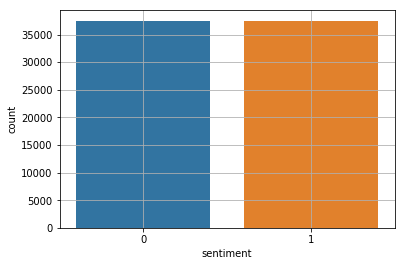

In [13]:
import seaborn as sns
sns.countplot(x=df['sentiment'])
plt.grid()

In [14]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.4'

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
model = Sequential()
model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
#model.add(layers.Bidirectional(layers.LSTM(32,activation='relu', return_sequences=True)))
model.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 60000 samples, validate on 15000 samples
Epoch 1/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.5821 - acc: 0.6975 - val_loss: 0.4274 - val_acc: 0.8165
Epoch 2/10
60000/60000 [==============================] - 206s 3ms/step - loss: 0.2847 - acc: 0.8822 - val_loss: 0.3249 - val_acc: 0.8655
Epoch 3/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.2026 - acc: 0.9205 - val_loss: 0.1383 - val_acc: 0.9535
Epoch 4/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.1501 - acc: 0.9449 - val_loss: 0.0986 - val_acc: 0.9691
Epoch 5/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.1065 - acc: 0.9625 - val_loss: 0.1149 - val_acc: 0.9609
Epoch 6/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0719 - acc: 0.9749 - val_loss: 0.0663 - val_acc: 0.9785
Epoch 7/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0518 - acc: 0.9824 - val_loss: 0.0279 - 

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
model = Sequential()
model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Bidirectional(layers.LSTM(32,activation='relu', return_sequences=True)))
model.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 60000 samples, validate on 15000 samples
Epoch 1/10
60000/60000 [==============================] - 210s 4ms/step - loss: 0.5027 - acc: 0.8251 - val_loss: 0.3627 - val_acc: 0.8551
Epoch 2/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2701 - acc: 0.8949 - val_loss: 0.3399 - val_acc: 0.8575
Epoch 3/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.2647 - acc: 0.8971 - val_loss: 0.2327 - val_acc: 0.9094
Epoch 4/10
60000/60000 [==============================] - 206s 3ms/step - loss: 0.2066 - acc: 0.9181 - val_loss: 0.2175 - val_acc: 0.9155
Epoch 5/10
60000/60000 [==============================] - 206s 3ms/step - loss: 0.1807 - acc: 0.9302 - val_loss: 0.1216 - val_acc: 0.9563
Epoch 6/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1557 - acc: 0.9395 - val_loss: 0.1293 - val_acc: 0.9562
Epoch 7/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1299 - acc: 0.9517 - val_loss: 0.0801 - 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']

max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
model = Sequential()
model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Bidirectional(layers.GRU(32,activation='relu', return_sequences=True)))
model.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [17]:
#BEST NETWORK
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
stemmer = PorterStemmer()

def stem_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = text.lower()
    text = [stemmer.stem(token) for token in text.split(" ")]
    text = " ".join(text)
    return text

df['Stemmed_Reviews'] = df.review.apply(lambda x: stem_text(x))

tokenizer_stemmed = Tokenizer(num_words=max_features)
tokenizer_stemmed.fit_on_texts(df['Stemmed_Reviews'])
list_tokenized_train_stemmed = tokenizer_stemmed.texts_to_sequences(df['Stemmed_Reviews'])

X_t_stemmed = pad_sequences(list_tokenized_train_stemmed, maxlen=maxlen)
y = df['sentiment']
class IMDBSentimentAnalysisModel(Sequential):
    def __init__(self, n_words, dim_embedding, max_len, conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(IMDBSentimentAnalysisModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
        self.add(layers.Conv1D(conv_filters, activation='selu', kernel_size=1, kernel_initializer="glorot_uniform", padding='same'))
        self.add(layers.Bidirectional(layers.GRU(gru_units, activation='relu')))
        self.add(layers.Dropout(dropout_rate))
        self.add(layers.Dense(1, activation='sigmoid'))

    def call(self, inputs):
        return super(IMDBSentimentAnalysisModel, self).call(inputs)
# Создание экземпляра модели с дополнительными параметрами
max_len = 130
n_words = 10000
dim_embedding = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = IMDBSentimentAnalysisModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Добавление коллбэков
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ModelCheckpoint(filepath='best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy')
]

# Обучение модели с коллбэками
model.fit(X_t_stemmed, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

Train on 60000 samples, validate on 15000 samples
Epoch 1/10
60000/60000 [==============================] - 374s 6ms/step - loss: 0.3743 - acc: 0.8269 - val_loss: 0.3176 - val_acc: 0.8794
Epoch 2/10
60000/60000 [==============================] - 370s 6ms/step - loss: 0.2326 - acc: 0.9072 - val_loss: 0.1739 - val_acc: 0.9361
Epoch 3/10
60000/60000 [==============================] - 370s 6ms/step - loss: 0.1814 - acc: 0.9307 - val_loss: 0.1569 - val_acc: 0.9453
Epoch 4/10
60000/60000 [==============================] - 369s 6ms/step - loss: 0.1366 - acc: 0.9499 - val_loss: 0.0840 - val_acc: 0.9729
Epoch 5/10
60000/60000 [==============================] - 376s 6ms/step - loss: 0.1005 - acc: 0.9642 - val_loss: 0.0675 - val_acc: 0.9802
Epoch 6/10
60000/60000 [==============================] - 372s 6ms/step - loss: 0.0734 - acc: 0.9746 - val_loss: 0.0516 - val_acc: 0.9830
Epoch 7/10
60000/60000 [==============================] - 384s 6ms/step - loss: 0.0540 - acc: 0.9818 - val_loss: 0.0299 - 

In [ ]:
model.save('imdb_best.keras')

In [ ]:
df_test=pd.read_csv("../input/word2vec-nlp-tutorial/testData.tsv",header=0, delimiter="\t", quoting=3)
df_test.head()
df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]
list_sentences_test = df_test["review"]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

In [ ]:
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.sequence import pad_sequences
stemmer = PorterStemmer()
max_features = 6000
def stem_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = text.lower()
    text = [stemmer.stem(token) for token in text.split(" ")]
    text = " ".join(text)
    return text

df['Stemmed_Reviews'] = df.review.apply(lambda x: stem_text(x))

tokenizer_stemmed = Tokenizer(num_words=max_features)
tokenizer_stemmed.fit_on_texts(df['Stemmed_Reviews'])
list_tokenized_train_stemmed = tokenizer_stemmed.texts_to_sequences(df['Stemmed_Reviews'])

X_t_stemmed = pad_sequences(list_tokenized_train_stemmed, maxlen=maxlen)
y = df['sentiment']
class IMDBSentimentAnalysisModel(Sequential):
    def __init__(self, n_words, dim_embedding, max_len, conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(IMDBSentimentAnalysisModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
        self.add(layers.SeparableConv1D(128,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.SeparableConv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.BatchNormalization())
        self.add(layers.MaxPooling1D(2))
        self.add(layers.SeparableConv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.SeparableConv1D(16,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(GlobalMaxPool1D())
        #model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(1, activation='sigmoid'))

    def call(self, inputs):
        return super(IMDBSentimentAnalysisModel, self).call(inputs)
# Создание экземпляра модели с дополнительными параметрами
max_len = 130
n_words = 10000
dim_embedding = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = IMDBSentimentAnalysisModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Добавление коллбэков
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ModelCheckpoint(filepath='best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy')
]

# Обучение модели с коллбэками
model.fit(X_t_stemmed, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])
maxlen = 130
# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])


X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000

n_words = 10000
dim_embedding = 64
embed_size = 128
model = Sequential()
model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
model.add(layers.SeparableConv1D(128,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.SeparableConv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))
model.add(layers.SeparableConv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.SeparableConv1D(16,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Добавление коллбэков
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ModelCheckpoint(filepath='best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy')
]

batch_size = 100
# Обучение модели с коллбэками
model.fit(X_t, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
model = Sequential()
model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Bidirectional(layers.GRU(32,activation='relu', return_sequences=True)))
model.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
model = Sequential()
model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.GRU(32,activation='relu', return_sequences=True)))
model.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
df_test=pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip',header=0, delimiter="\t", quoting=3)
df_test.head()
df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]
list_sentences_test = df_test["review"]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

Подключаем другой датасет и применяем лучшую полученную архитектуру

In [32]:
import json
import re 
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout, SimpleRNN, Conv1D, Bidirectional,GRU

stopwords = stopwords.words("english")


#Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [33]:
train_data = pd.read_csv("/kaggle/input/goemotions/data/train.tsv", sep="\t", header=None, names=["Comment", "Class", "Delete"])
test_data = pd.read_csv("/kaggle/input/goemotions/data/test.tsv", sep="\t", header=None, names=["Comment", "Class", "Delete"])
val_data = pd.read_csv("/kaggle/input/goemotions/data/dev.tsv", sep="\t", header=None, names=["Comment", "Class", "Delete"])

In [34]:
train_data = train_data.drop("Delete", axis=1)
test_data = test_data.drop("Delete", axis=1)
val_data = val_data.drop("Delete", axis=1)

In [35]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(43410, 2)
(5427, 2)
(5426, 2)


In [ ]:
train_data.head()

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 2 columns):
Comment    43410 non-null object
Class      43410 non-null object
dtypes: object(2)
memory usage: 678.4+ KB


In [36]:
train_data["Class list"] = train_data["Class"].apply(lambda x: x.split(","))
train_data["Class len"] = train_data["Class list"].apply(lambda x: len(x))

test_data["Class list"] = test_data["Class"].apply(lambda x: x.split(","))
test_data["Class len"] = test_data["Class list"].apply(lambda x: len(x))

val_data["Class list"] = val_data["Class"].apply(lambda x: x.split(","))
val_data["Class len"] = val_data["Class list"].apply(lambda x: len(x))

In [37]:
with open("/kaggle/input/goemotions/data/ekman_mapping.json") as file:
    ekman_mapping = json.load(file)

In [38]:
emotion_file = open("/kaggle/input/goemotions/data/emotions.txt", "r")
emotion_list = emotion_file.read()
emotion_list = emotion_list.split("\n")
print(emotion_list)
print(len(emotion_list))

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
28


In [39]:
def idx2class(idxlist):
    arr = []
    for i in idxlist:
        arr.append(emotion_list[int(i)])
    return arr

In [40]:
# Converting the class indexes back to class names
train_data["Emotion"] = train_data["Class list"].apply(idx2class)
test_data["Emotion"] = test_data["Class list"].apply(idx2class)
val_data["Emotion"] = val_data["Class list"].apply(idx2class)

In [41]:
def EmotionMapping(emotion_list):
    map_list = []
    
    for i in emotion_list:
        if i in ekman_mapping["anger"]:
            map_list.append("anger")
        if i in ekman_mapping["disgust"]:
            map_list.append("disgust")
        if i in ekman_mapping["fear"]:
            map_list.append("fear")
        if i in ekman_mapping["joy"]:
            map_list.append("joy")
        if i in ekman_mapping["sadness"]:
            map_list.append("sadness")
        if i in ekman_mapping["surprise"]:
            map_list.append("surprise")
        if i == "neutral":
            map_list.append("neutral")
            
    return map_list

In [42]:
# Convert the classes based on Ekman Taxonomy
train_data["Mapped_emotion"] = train_data["Emotion"].apply(EmotionMapping)
test_data["Mapped_emotion"] = test_data["Emotion"].apply(EmotionMapping)
val_data["Mapped_emotion"] = val_data["Emotion"].apply(EmotionMapping)

In [43]:
train_data["Mapped_emotion"] = train_data["Mapped_emotion"].apply(lambda x: ','.join(x))
test_data["Mapped_emotion"] = test_data["Mapped_emotion"].apply(lambda x: ','.join(x))
val_data["Mapped_emotion"] = val_data["Mapped_emotion"].apply(lambda x: ','.join(x))
train_data = train_data.drop(["Class", "Class list", "Class len", "Emotion"], axis=1)
test_data = test_data.drop(["Class", "Class list", "Class len", "Emotion"], axis=1)
val_data = val_data.drop(["Class", "Class list", "Class len", "Emotion"], axis=1)
train_data_1= train_data["Mapped_emotion"].str.split(",", expand=True)
test_data_1= test_data["Mapped_emotion"].str.split(",", expand=True)
val_data_1= val_data["Mapped_emotion"].str.split(",", expand=True)
train_data_1.drop(train_data_1.columns[1:5], axis=1, inplace=True)
test_data_1.drop(test_data_1.columns[1:5], axis=1, inplace=True)
val_data_1.drop(val_data_1.columns[1:5], axis=1, inplace=True)
train_data = pd.concat([train_data, train_data_1], axis=1)
test_data = pd.concat([test_data, test_data_1], axis=1)
val_data = pd.concat([val_data, val_data_1], axis=1)
train_data.rename(columns={0: "Emotion"}, inplace=True)
test_data.rename(columns={0: "Emotion"}, inplace=True)
val_data.rename(columns={0: "Emotion"}, inplace=True)
train_data = train_data.drop(["Mapped_emotion"], axis=1)
test_data = test_data.drop(["Mapped_emotion"], axis=1)
val_data = val_data.drop(["Mapped_emotion"], axis=1)
#Checking if the data is balanced or not
train_data.Emotion.value_counts()

joy         16948
neutral     12823
anger        5336
surprise     4489
sadness      2619
fear          615
disgust       580
Name: Emotion, dtype: int64

In [44]:
emotion_list = train_data["Emotion"].unique()
emotion_list

array(['neutral', 'anger', 'fear', 'surprise', 'joy', 'sadness',
       'disgust'], dtype=object)

In [ ]:
def word_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.suptitle(df + " Word Cloud", size=15)
    plt.imshow(wordcloud)
    plt.axis("off")

In [ ]:
for emotion in emotion_list:
    text = " ".join([sentence for sentence in train_data.loc[train_data["Emotion"] == emotion, "Comment"]])
    wordcloud = WordCloud(width=600, height=600).generate(text)
    word_cloud(wordcloud, emotion)

In [45]:
train_data["Emotion"] = train_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})
test_data["Emotion"] = test_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})
val_data["Emotion"] = val_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})
# Check for null values
print("Train data:", train_data.isnull().sum())

print("Test data:", test_data.isnull().sum())

print("Validation data:", val_data.isnull().sum())

Train data: Comment    0
Emotion    0
dtype: int64
Test data: Comment    0
Emotion    0
dtype: int64
Validation data: Comment    0
Emotion    0
dtype: int64


In [46]:
# Check duplicated values
print("Train data:", train_data.duplicated().sum())

print("Test data:", test_data.duplicated().sum())

print("Validation data:", val_data.duplicated().sum())

Train data: 152
Test data: 6
Validation data: 3


In [47]:
#Removing Duplicated values
index = train_data[train_data.duplicated() == True].index
train_data.drop(index, axis=0, inplace=True)
train_data.reset_index(inplace=True, drop=True)

index = test_data[test_data.duplicated() == True].index
test_data.drop(index, axis=0, inplace=True)
test_data.reset_index(inplace=True, drop=True)

index = val_data[val_data.duplicated() == True].index
val_data.drop(index, axis=0, inplace=True)
val_data.reset_index(inplace=True, drop=True)
#print rows which are duplicated in the text but the same emotion
train_data[train_data["Comment"].duplicated() == True]

,Comment,Emotion
6610,My man!,3
7925,What do you mean?,5
8344,Weird flex but okay,3
8978,[NAME],6
9375,Grow up.,0
9481,Weird flex but ok,1
14012,You're welcome,6
14104,This is horrible,2
15809,Lol no.,3
20768,Oh boy yeah,3


In [48]:
# Removing the duplicate text
index = train_data[train_data["Comment"].duplicated() == True].index
train_data.drop(index, axis=0, inplace = True)
train_data.reset_index(inplace=True, drop=True)

In [49]:
train_data["Length"] = [len(x) for x in train_data["Comment"]]
print(len(stopwords))

# Max length of senetence
max_len = train_data["Length"].max()
print(max_len)

179
703


In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
vocabsize = 18000   #20-12551 #30-15000 43-17555
vocabsize = int(vocabsize * 5 )
print(vocabsize)

90000


In [51]:
def text_cleaning(df, column):
    stemmer = PorterStemmer()
    corpus = []
    
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    # Split each sentence into a list of words and flatten the list of lists into a single list
    words = [word.lower() for sentence in corpus for word in nltk.word_tokenize(sentence)]

    # Convert the list of words into a set to remove duplicates and find the number of unique words
    unique_words = set(words)
    num_unique_words = len(unique_words)

    print(f"Number of unique words: {num_unique_words}")
    one_hot_word = [one_hot(word, vocabsize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding="pre")
    print(pad.shape)
    return pad

In [52]:
X_train = text_cleaning(train_data, "Comment")
X_test = text_cleaning(test_data, "Comment")
X_val = text_cleaning(val_data, "Comment")

Number of unique words: 17555
(43227, 703)
Number of unique words: 6167
(5421, 703)
Number of unique words: 6237
(5423, 703)


In [53]:
y_train = train_data["Emotion"]
y_test = test_data["Emotion"]
y_val = val_data["Emotion"]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

используем SMOTE, т.к. комментариев с наиболее часто встречаемой эмоцией в 29 раз больше, чем с наименее часто встречаемой эмоцией 

In [54]:
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)
smote = SMOTE(sampling_strategy='minority')
X_test, y_test = smote.fit_resample(X_test, y_test)
y_test.shape

(7386, 7)

In [55]:
smote = SMOTE(sampling_strategy='minority')
X_val, y_val = smote.fit_resample(X_val, y_val)

In [56]:
import keras
#создание модели
class EmotionsModel(Sequential):
    def __init__(self,n_words,dim_embedding,max_len,conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(EmotionsModel, self).__init__()
        self.add(keras.layers.Embedding(input_dim=vocabsize, output_dim=128, input_length=max_len))
        self.add(keras.layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(keras.layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(keras.layers.Bidirectional(keras.layers.GRU(32,activation='relu', return_sequences=True)))
        self.add(keras.layers.Dropout(0.2))
        self.add(keras.layers.GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
       # self.add(keras.layers.Dropout(0.2))
        self.add(keras.layers.Dense(7, activation="sigmoid"))
    def call(self, inputs):
        return super(EmotionsModel, self).call(inputs)
n_words = 10000
dim_embedding = 64
embed_size = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = EmotionsModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 703, 128)          11520000  
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 703, 64)           8256      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 703, 32)           2080      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 703, 64)           12480     
_________________________________________________________________
dropout_4 (Dropout)          (None, 703, 64)           0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 455       
Total para

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

hist = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val),)

Train on 59487 samples, validate on 7515 samples
Epoch 1/10
59487/59487 [==============================] - 654s 11ms/step - loss: 1.3607 - acc: 0.4962 - val_loss: 0.9014 - val_acc: 0.6770
Epoch 2/10
59487/59487 [==============================] - 656s 11ms/step - loss: 0.8176 - acc: 0.7039 - val_loss: 0.8282 - val_acc: 0.7116
Epoch 3/10
14848/59487 [======>.......................] - ETA: 7:56 - loss: 0.6863 - acc: 0.7512

дальше идут модели, которые были выше, оформленные в виде классов

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])
class FirstModel(Sequential):
    def __init__(self,n_words,dim_embedding,max_len,conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(FirstModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
        self.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
#model.add(layers.Bidirectional(layers.LSTM(32,activation='relu', return_sequences=True)))
        self.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
    def call(self, inputs):
        return super(FirstModel, self).call(inputs)
maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = FirstModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])
class SecondModel(Sequential):
    def __init__(self,n_words,dim_embedding,max_len,conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(SecondModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
        self.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Bidirectional(layers.LSTM(32,activation='relu', return_sequences=True)))
        self.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
    def call(self, inputs):
        return super(SecondModel, self).call(inputs)
maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = SecondModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

class ThirdModel(Sequential):
    def __init__(self,n_words,dim_embedding,max_len,conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(ThirdModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
        self.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Bidirectional(layers.GRU(32,activation='relu', return_sequences=True)))
        self.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
    def call(self, inputs):
        return super(ThirdModel, self).call(inputs)
#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']

max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = ThirdModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])
maxlen = 130
# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])
class FourthModel(Sequential):
    def __init__(self,n_words,dim_embedding,max_len,conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(FourthModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
        self.add(layers.SeparableConv1D(128,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.SeparableConv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.BatchNormalization())
        self.add(layers.MaxPooling1D(2))
        self.add(layers.SeparableConv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.SeparableConv1D(16,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
    def call(self, inputs):
        return super(FourthModel, self).call(inputs)

X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000

n_words = 10000
dim_embedding = 64
embed_size = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = FourthModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Добавление коллбэков
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ModelCheckpoint(filepath='best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy')
]

batch_size = 100
# Обучение модели с коллбэками
model.fit(X_t, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])
class FifthModel(Sequential):
    def __init__(self,n_words,dim_embedding,max_len,conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(FifthModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
        self.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Bidirectional(layers.GRU(32,activation='relu', return_sequences=True)))
        self.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
    def call(self, inputs):
        return super(FifthModel, self).call(inputs)
maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = FifthModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(df['Processed_Reviews'])

list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

# Add bigrams to the tokenizer
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= max_features}
tokenizer.word_index[tokenizer.num_words] = tokenizer.num_words
tokenizer.word_index[tokenizer.num_words + 1] = tokenizer.num_words + 1
num_words = tokenizer.num_words + 1
max_len = 130

def pad_content_input(sentence_sequences, n_gram_range):
    return [[col for idx, col in enumerate(row) if not (col > n_gram_range + len(row) or idx - col < 1)] for row in sentence_sequences]

list_tokenized_train_with_bigrams = tokenizer.texts_to_sequences(list(df['Processed_Reviews']))
max_features = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
max_len = max_len + 2  # for the bigrams

#max_features = 6000
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(df['Processed_Reviews'])
#list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])
class SixthModel(Sequential):
    def __init__(self,n_words,dim_embedding,max_len,conv_filters=64, gru_units=64, dropout_rate=0.2):
        super(SixthModel, self).__init__()
        self.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
    #model.add(layers.Dropout(0.3))
        self.add(layers.Conv1D(64,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.Conv1D(32,activation='selu', kernel_size=1,kernel_initializer = "glorot_uniform",padding='same'))
        self.add(layers.BatchNormalization())
        self.add(layers.Bidirectional(layers.GRU(32,activation='relu', return_sequences=True)))
        self.add(GlobalMaxPool1D())
#model.add(layers.Bidirectional(layers.GRU(32,activation='relu')))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(1, activation='sigmoid'))
#model.add(Embedding(max_features, embed_size))
#model.add(Bidirectional(LSTM(32, return_sequences = True)))
#model.add(GlobalMaxPool1D())
#model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.05))
#model.add(Dense(1, activation="sigmoid"))
    def call(self, inputs):
        return super(SixthModel, self).call(inputs)
maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']
num_words = 20000
max_len = 130
n_words = 10000
dim_embedding = 64
embed_size = 128
conv_filters = 64
gru_units = 64
dropout_rate = 0.2
model = SixthModel(n_words, dim_embedding, max_len, conv_filters, gru_units, dropout_rate)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

batch_size = 100
epochs = 10
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)